### Test Dunkirk sand against paper Burd et al (2020)


/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: 
The method Analyze.simple_winkler_analysis() will be removed in version 1.0.0.
Please use the Analyze.winkler() instead.


Converged at iteration no. 3
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 5
Converged at iteration no. 5


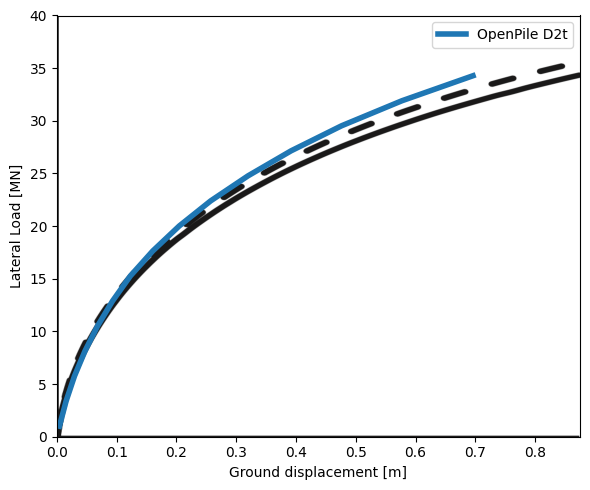

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Cowden_clay, Dunkirk_sand
from openpile.analyze import simple_winkler_analysis

# Plot with piles D2t
fig, ax = plt.subplots(figsize=[6, 5])
im = plt.imread("GDSM_pile_D2t_Burd_et_al_2020.png")
im = ax.imshow(im, extent=[0, 0.875, 0, 40], aspect="auto")
ax.set_xlim([0, 0.875])
ax.set_xlabel("Ground displacement [m]")
ax.set_ylabel("Lateral Load [MN]")

# G0 modulus
G0_func = (
    lambda x: (875 * 101.3) / (0.3 + 0.7 * 0.629**2) * ((x * 10.09 * 1.8 / 3) / 101.3) ** 0.5
)

# Pile D2t
pile = Pile.create_tubular(name="", top_elevation=0, bottom_elevation=-35, diameter=10, wt=0.091)


sp = SoilProfile(
    name="",
    top_elevation=0,
    water_line=10,
    layers=[
        Layer(
            name="",
            top=0,
            bottom=-35,
            weight=20.09,
            lateral_model=Dunkirk_sand(Dr=[55], G0=[G0_func(1), G0_func(35)]),
        ),
    ],
)

M = Model(name="", pile=pile, soil=sp, coarseness=0.5)
M.set_support(elevation=-35, Tx=True)

vg = []
applied_loads = np.linspace(1, 34.28, 15)
e = 87.5

for Hg in applied_loads:
    M.set_pointload(elevation=0, Py=Hg * 1e3, Mz=-Hg * 1e3 * e)
    result = simple_winkler_analysis(M)

    vg.append(result.deflection["Deflection [m]"][0])

ax.plot(vg, applied_loads, linewidth=4)
ax.legend(["OpenPile D2t"])

plt.tight_layout()
plt.savefig("../docs/source/_static/validation/GDSM_D2t.png")


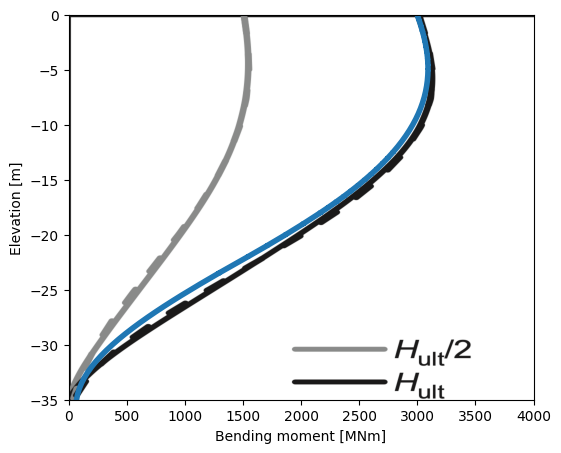

In [3]:
# Plot with piles D2t
fig, ax = plt.subplots(figsize=[6, 5])
im = plt.imread("GDSM_pile_D2t_Burd_et_al_2020_M.png")
im = ax.imshow(im, extent=[0, 4000, -35, 0], aspect="auto")
ax.set_xlim([0, 4000])
ax.set_ylim([-35, 0])
ax.set_xlabel("Bending moment [MNm]")
ax.set_ylabel("Elevation [m]")
ax.plot(-result.forces["M [kNm]"].values / 1000, result.forces["Elevation [m]"].values, linewidth=4)

plt.savefig("../docs/source/_static/validation/GDSM_D2t_moment.png")


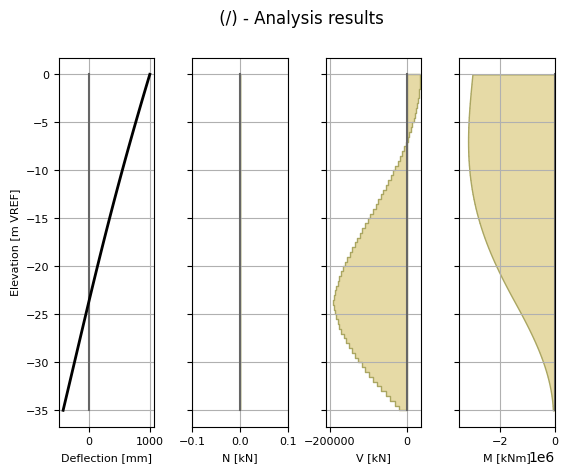

In [3]:
result.plot()


(0.0, 1000.0)

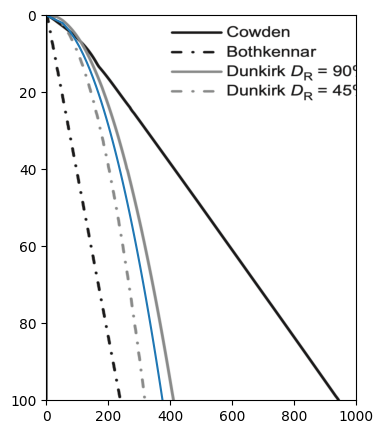

In [17]:
import matplotlib.pyplot as plt

# G0 modulus
G0_func = (
    lambda x: (875 * 101.3) / (0.3 + 0.7 * 0.629**2) * ((x * 10.09 * 1.8 / 3) / 101.3) ** 0.5
)

y = np.linspace(0, 100, 50)
x = G0_func(y) / 1000

fig, ax = plt.subplots(figsize=(4, 5))
ax.invert_yaxis()
im = plt.imread("Burd_et_al_G0_profile.png")
im = ax.imshow(im, extent=[0, 1000, 100, 0], aspect="auto")
ax.plot(x, y)
ax.set_xlim([None, 1000])
